## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
Titanic_data = pd.read_csv('C:/Users/Sue Lin/ML100Days/EDA/Titanic_train.csv')  
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 觀察 Age

In [3]:
Titanic_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
missing_vals = Titanic_data.isnull().sum()/len(Titanic_data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


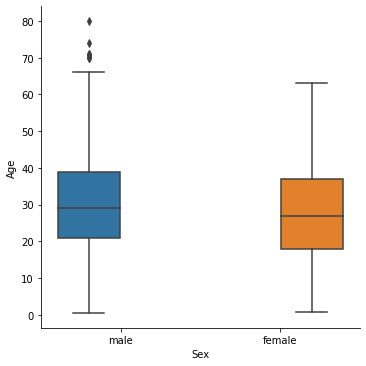

In [11]:
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=Titanic_data,kind="box")

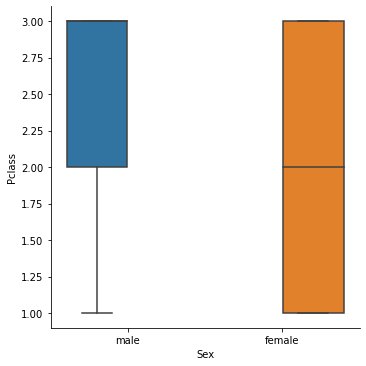

In [68]:
g = sns.catplot(x="Sex", y="Pclass", hue="Sex",
               data=Titanic_data,kind="box")

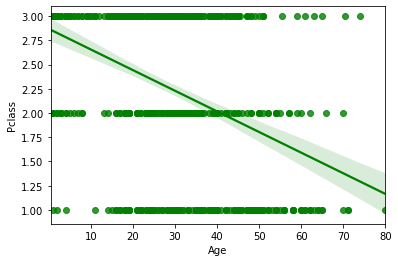

In [14]:
g = sns.regplot(x="Age", y="Pclass", color="g",data=Titanic_data)

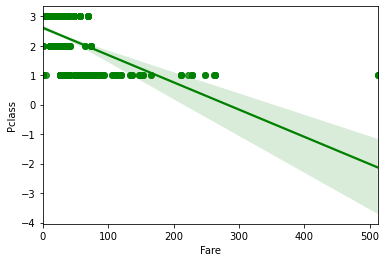

In [15]:
g = sns.regplot(x="Fare", y="Pclass", color="g",data=Titanic_data)

c:\users\sue lin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


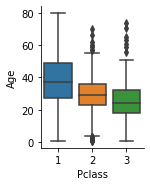

In [18]:
g = sns.catplot("Pclass",'Age',
                data=Titanic_data,
                kind="box", height=2.5, aspect=.8)

In [20]:
missing_index=Titanic_data.isnull()
display(Titanic_data[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [46]:
data1=Titanic_data.copy()

In [48]:
data1 = data1[['Pclass','Sex','Age']]
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
data1['Sex']=le.fit_transform(data1['Sex'])
display(data1)

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [49]:
missing_index=data1.isnull()
display(data1[missing_index.values==True])

,Pclass,Sex,Age
5,3,1,NaN
17,2,1,NaN
19,3,0,NaN
26,3,1,NaN
28,3,0,NaN
...,...,...,...
859,3,1,NaN
863,3,0,NaN
868,3,1,NaN
878,3,1,NaN


In [50]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data1)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [71]:
# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)
df_filled = pd.DataFrame(imputer.fit_transform(data1))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2,3
0,3.0,1.0,22.0,0.0
1,1.0,0.0,38.0,0.0
2,3.0,0.0,26.0,0.0
3,1.0,0.0,35.0,0.0
4,3.0,1.0,35.0,0.0
...,...,...,...,...
886,2.0,1.0,27.0,0.0
887,1.0,0.0,19.0,0.0
888,3.0,0.0,26.0,1.0
889,1.0,1.0,26.0,0.0


In [73]:
df_filled.loc[df_filled[3] == 1.0]
#0=Pclass;1=Sex;2=Age

,0,1,2,3
5,3.0,1.0,22.0,1.0
17,2.0,1.0,35.0,1.0
19,3.0,0.0,26.0,1.0
26,3.0,1.0,22.0,1.0
28,3.0,0.0,26.0,1.0
...,...,...,...,...
859,3.0,1.0,22.0,1.0
863,3.0,0.0,26.0,1.0
868,3.0,1.0,22.0,1.0
878,3.0,1.0,22.0,1.0


In [105]:
df_filled.loc[(df_filled[3] == 1.0) & (df_filled[1] == 1.0)]
#K=1時，男補值 = 3等艙22歲; 2等艙35歲;1等艙54歲

,0,1,2,3
5,3.0,1.0,22.0,1.0
17,2.0,1.0,35.0,1.0
26,3.0,1.0,22.0,1.0
29,3.0,1.0,22.0,1.0
36,3.0,1.0,22.0,1.0
...,...,...,...,...
839,1.0,1.0,54.0,1.0
846,3.0,1.0,22.0,1.0
859,3.0,1.0,22.0,1.0
868,3.0,1.0,22.0,1.0


In [104]:
df_filled.loc[(df_filled[1] == 0.0) & (df_filled[3] == 1.0)]
#K=1時，女補值 = 3等艙26歲; 2等艙14歲;1等艙38歲

,0,1,2,3
19,3.0,0.0,26.0,1.0
28,3.0,0.0,26.0,1.0
31,1.0,0.0,38.0,1.0
32,3.0,0.0,26.0,1.0
47,3.0,0.0,26.0,1.0
82,3.0,0.0,26.0,1.0
109,3.0,0.0,26.0,1.0
128,3.0,0.0,26.0,1.0
140,3.0,0.0,26.0,1.0
166,1.0,0.0,38.0,1.0
